<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

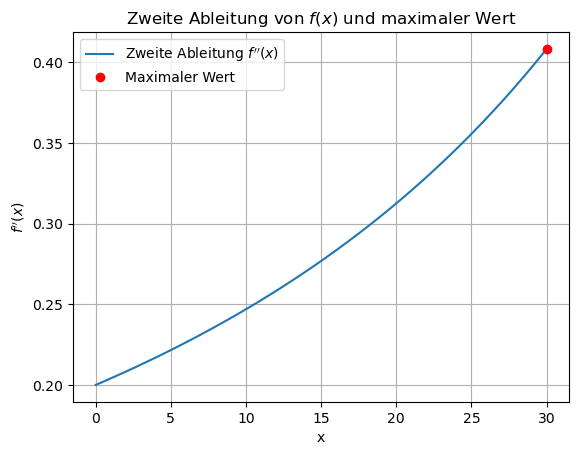

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [29]:
# Cell 1: Import libraries
import math
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from IPython.display import display, Latex

# Cell 2: Define the function, its derivatives, and constants
x = sy.symbols('x')

'''INPUT'''
f = 2000*sy.ln(10000/(10000-100*x)) - 9.8*x  # funktion
a, b = 0,30
err = 10**(-3)
'''INPUT'''

# Display the function
display(Latex(f'Function: $f(x) = {sy.latex(f)}$'))

# Cell 3: Calculate and display the first and second derivatives
erste_ableitung = f.diff(x)
zweite_ableitung = erste_ableitung.diff()
display(Latex(f"$f'(x): {sy.latex(erste_ableitung)} \\quad f''(x): {sy.latex(zweite_ableitung)}$"))

# Cell 4: Calculate the maximum value of the second derivative over the interval [a, b]
dfl = sy.lambdify(x, zweite_ableitung)
x_range = np.linspace(a, b, 100)
max_y = np.amax(abs(dfl(x_range)))
display(Latex(f"Maximaler Wert der zweiten Ableitung: {max_y}"))
'''PLOT'''
# Schritt 1: Erstellen eines Arrays von x-Werten
x_values = np.linspace(a, b, 100)
# Schritt 2: Berechnen der Werte der zweiten Ableitung
y_values = dfl(x_values)
# Schritt 3: Plotten der x-Werte gegen die berechneten Werte der zweiten Ableitung
plt.plot(x_values, y_values, label='Zweite Ableitung $f\'\'(x)$')
# Schritt 4: Hervorheben des maximalen Werts
plt.plot(x_values[np.argmax(abs(y_values))], max_y, 'ro', label='Maximaler Wert')
plt.title('Zweite Ableitung von $f(x)$ und maximaler Wert')
plt.xlabel('x')
plt.ylabel('$f\'\'(x)$')
plt.legend()
plt.grid(True)
plt.show()
'''PLOT'''

# Cell 5: Calculate and display the maximum step sizes and number of steps for rectangle, trapezoid, and Simpson's rule
h_rf = np.sqrt(err * 24 / ((b - a) * max_y))
h_tf = np.sqrt(err * 12 / ((b - a) * max_y))
h_sf = np.sqrt(np.sqrt(err * 2880 / ((b - a) * max_y)))
exponent = int(math.log10(err))

display(Latex(r'$\frac{h^2}{24} \cdot (b-a) \cdot \max |f^{\prime\prime}(x)| \leq 10^{exponent}$'))
display(Latex(rf'$\frac{{h^2}}{{24}} \cdot ({b}-{a}) * {max_y} \leq 10^{{{int(math.log10(err))}}}$'))
display(Latex(rf'$\frac{{h^2}}{{24}} \leq 10^{{{int(math.log10(err))}}}$'))
display(Latex(rf'$h = \frac{{b - a}}{{n}}$'))
display(Latex(rf'$n = \frac{{b - a}}{{h}}$'))
display(Latex(f"Maximale Schrittweite Rechteck: {h_rf}, Maximale Schritte $n={np.ceil((b-a)/h_rf)}$"))

display(Latex(r'$\frac{h^2}{12} \cdot (b-a) \cdot \max |f^{\prime\prime}(x)| \leq 10^{exponent}$'))
display(Latex(rf'$\frac{{h^2}}{{12}} \cdot ({b}-{a}) * {max_y} \leq 10^{{{int(math.log10(err))}}}$'))
display(Latex(rf'$\frac{{h^2}}{{12}} \leq 10^{{{int(math.log10(err))}}}$'))
display(Latex(rf'$h = \frac{{b - a}}{{n}}$'))
display(Latex(rf'$n = \frac{{b - a}}{{h}}$'))
display(Latex(f"Maximale Schrittweite Trapez: {h_tf}, Maximale Schritte $n={np.ceil((b-a)/h_tf)}$"))


display(Latex(r'$\frac{h^4}{2880} \cdot (b-a) \cdot \max |f^{\prime\prime\prime\prime}(x)| \leq 10^{exponent}$'))
display(Latex(rf'$\frac{{h^4}}{{2880}} \cdot ({b}-{a}) * {max_y} \leq 10^{{{int(math.log10(err))}}}$'))
display(Latex(rf'$\frac{{h^4}}{{2880}} \leq 10^{{{int(math.log10(err))}}}$'))
display(Latex(rf'$h = \frac{{b - a}}{{n}}$'))
display(Latex(rf'$n = \frac{{b - a}}{{h}}$'))
display(Latex(f"Maximale Schrittweite Simpson: {h_sf}, Maximale Schritte $n={np.ceil((b-a)/h_sf)}$"))